In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import skew, kurtosis

In [36]:
df = pd.read_csv(r"F:\OneDrive - University of Hertfordshire\weight_change_dataset.csv")
df.head(10)

,Participant_ID,Age,Gender,Current_Weight,BMR,Daily_Calories_Consumed,Daily_Caloric_Surplus,Weight_Change,Duration,Physical_Activity_Level,Sleep_Quality,Stress_Level,Final_Weight
0,1,56,M,228.4,3102.3,3916.0,813.7,0.200000,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.400000,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.400000,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.800000,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.000000,10,Lightly Active,Good,1,157.5
5,6,56,F,152.9,2100.6,2262.4,161.9,-12.513498,9,Sedentary,Poor,6,140.4
6,7,36,M,107.3,1991.3,2933.4,942.1,-2.437307,2,Moderately Active,Poor,5,104.9
7,8,40,M,207.9,2977.9,4000.0,1022.1,-35.678115,11,Moderately Active,Poor,9,172.2
8,9,28,F,169.5,2406.9,3890.2,1483.4,-8.476633,10,Very Active,Poor,1,161.0
9,10,28,F,169.2,2403.3,2485.8,82.5,0.000000,2,Sedentary,Excellent,7,169.2


In [37]:
print(df.isnull().sum())


Participant_ID             0
Age                        0
Gender                     0
Current_Weight             0
BMR                        0
Daily_Calories_Consumed    0
Daily_Caloric_Surplus      0
Weight_Change              0
Duration                   0
Physical_Activity_Level    0
Sleep_Quality              0
Stress_Level               0
Final_Weight               0
dtype: int64


In [38]:
df.describe()

,Participant_ID,Age,Current_Weight,BMR,Daily_Calories_Consumed,Daily_Caloric_Surplus,Weight_Change,Duration,Stress_Level,Final_Weight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.910000,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,4.810000,168.750000
std,29.011492,12.219454,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,2.576879,30.588004
min,1.000000,18.000000,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,1.000000,98.200000
25%,25.750000,26.750000,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,2.750000,149.550000
50%,50.500000,38.000000,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,5.000000,169.800000
75%,75.250000,46.250000,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,7.000000,188.300000
max,100.000000,59.000000,238.200000,3390.800000,4000.000000,1922.500000,5.000000,12.000000,9.000000,232.500000


In [39]:
 # Correlation
df.corr()

C:\Users\Hi\AppData\Local\Temp\ipykernel_3136\1351077496.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Participant_ID,Age,Current_Weight,BMR,Daily_Calories_Consumed,Daily_Caloric_Surplus,Weight_Change,Duration,Stress_Level,Final_Weight
Participant_ID,1.000000,-0.004060,-0.037135,-0.040059,0.018967,0.065483,-0.013126,0.199775,0.144369,-0.040190
Age,-0.004060,1.000000,-0.021417,-0.196723,-0.092822,0.064729,0.062721,-0.086001,0.018057,-0.005977
Current_Weight,-0.037135,-0.021417,1.000000,0.929308,0.611067,-0.067295,-0.088776,-0.020588,-0.056170,0.970159
BMR,-0.040059,-0.196723,0.929308,1.000000,0.690239,-0.027257,-0.107189,-0.003575,-0.071591,0.895571
Daily_Calories_Consumed,0.018967,-0.092822,0.611067,0.690239,1.000000,0.704499,-0.058110,0.062219,0.003171,0.591838
Daily_Caloric_Surplus,0.065483,0.064729,-0.067295,-0.027257,0.704499,1.000000,0.024845,0.089475,0.074585,-0.060773
Weight_Change,-0.013126,0.062721,-0.088776,-0.107189,-0.058110,0.024845,1.000000,-0.135128,-0.487724,0.155386
Duration,0.199775,-0.086001,-0.020588,-0.003575,0.062219,0.089475,-0.135128,1.000000,0.012801,-0.053311
Stress_Level,0.144369,0.018057,-0.056170,-0.071591,0.003171,0.074585,-0.487724,0.012801,1.000000,-0.174457
Final_Weight,-0.040190,-0.005977,0.970159,0.895571,0.591838,-0.060773,0.155386,-0.053311,-0.174457,1.000000


In [40]:
df.dtypes

Participant_ID               int64
Age                          int64
Gender                      object
Current_Weight             float64
BMR                        float64
Daily_Calories_Consumed    float64
Daily_Caloric_Surplus      float64
Weight_Change              float64
Duration                     int64
Physical_Activity_Level     object
Sleep_Quality               object
Stress_Level                 int64
Final_Weight               float64
dtype: object

In [41]:
df.columns

Index(['Participant_ID', 'Age', 'Gender', 'Current_Weight', 'BMR ',
       'Daily_Calories_Consumed', 'Daily_Caloric_Surplus', 'Weight_Change',
       'Duration', 'Physical_Activity_Level', 'Sleep_Quality', 'Stress_Level',
       'Final_Weight'],
      dtype='object')

In [83]:
def plot_histogram(data):
    plt.figure(figsize=(10,6))   
    
    sns.histplot(df['Age'], bins=20, kde=True, color='red')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count of Individual')
    plt.show()

In [77]:
age_skewness = skew(df['Age'])
age_kurtosis = kurtosis(df['Age'], fisher=False)
print("Skewness:", age_skewness)
print("Kurtosis:", age_kurtosis)

Skewness: 0.09904174379357236
Kurtosis: 1.8724863190013157


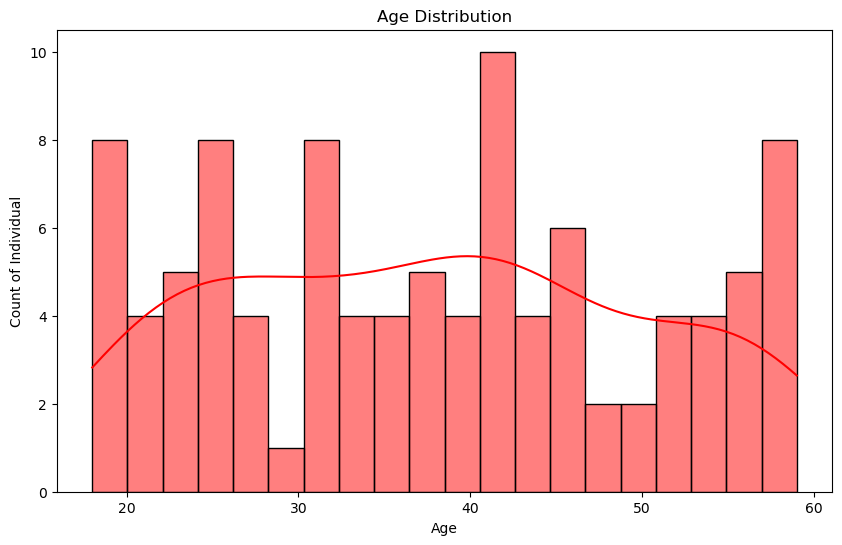

In [84]:
plot_histogram(df)

In [46]:
# Function to create a line graph
def plot_line(data):
    avg_weight_by_age = data.groupby('Age')['Current_Weight'].mean().reset_index()
    #plt.figure(figsize=(10, 6))
    plt.plot(avg_weight_by_age['Age'], avg_weight_by_age['Current_Weight'], marker='o')
    
    # Formatting
    # Add Axis Labels
    plt.title('Average Weight by Age')
    plt.xlabel('Age')
    plt.ylabel('Average Weight')
    plt.grid()
    plt.show()




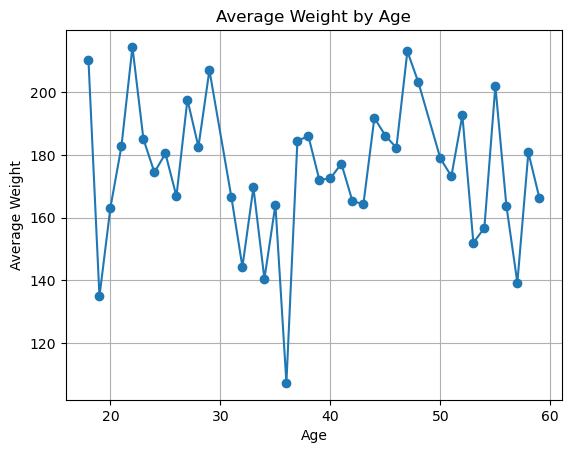

In [47]:
plot_line(df)

In [48]:
# Function to create a Violin Graph
def plot_violin(data):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Duration', y='Final_Weight', data=data)
    plt.title('Final Weight By Its Duration')
    #plt.xticks(rotation=45)
    plt.show()

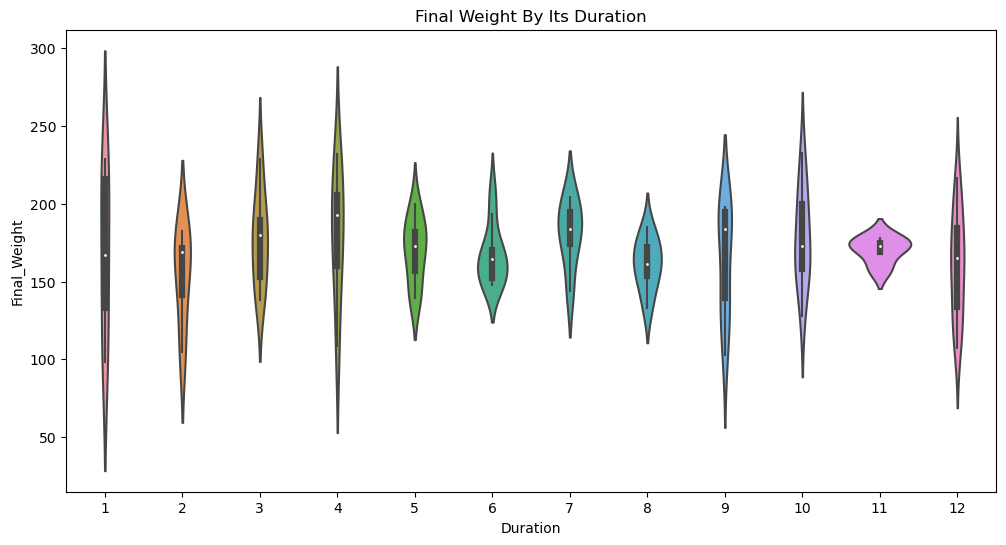

In [49]:
plot_violin(df)